# Visualize data

In [ ]:
import os
import numpy as np
import pandas as pd
from datetime import date

from pandas.api.types import CategoricalDtype

import seaborn as sns
import matplotlib.pyplot as plt

## load data

In [ ]:
datafile = f'cleaned_{date.today()}.csv'

# check if datafile is most up-to-date
[print('not using the latest data') for file in os.listdir() if (file.startswith('combined') & (datafile < file))]

df = pd.read_csv(datafile).astype({'n': int, 'parkrun': 'category', 'state': 'category', 'gender': 'category', 'agegroup': CategoricalDtype(ordered=True)})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1813965 entries, 0 to 1813964
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   name      object  
 1   n         int64   
 2   parkrun   category
 3   gender    category
 4   agegroup  category
 5   time      float64 
dtypes: category(3), float64(1), int64(1), object(1)
memory usage: 48.5+ MB


## plot data

In [ ]:
def standard_plots(df, label):

    fig,ax = plt.subplots(2,2, figsize = (8,5))

    # distribution of parkrunners
    tmp = (df.groupby(['gender','agegroup'])['name'].count()/len(df)).reset_index()
    sns.lineplot(
        ax = ax[0,0], data = tmp, x = 'agegroup', y = 'name', 
        hue = 'gender', marker = 'o'
    )
    ax[0,0].set(title = f'Number of parkrunners ({label})',ylabel='n')
    
    # mean number of runs
    tmp = df.groupby(['gender','agegroup'])['n'].mean().reset_index()
    sns.lineplot(
        ax = ax[0,1], data = tmp, x = 'agegroup', y = 'n', 
        hue = 'gender', marker = 'o'
    )
    ax[0,1].set(title = f'Mean number of runs ({label})', ylim = [0,15])
    
    # best time
    tmp = df.groupby(['gender','agegroup'])['time'].min().reset_index()
    sns.lineplot(
        ax = ax[1,0],data = tmp, x = 'agegroup', y = 'time', 
        hue = 'gender', marker = 'o'
    )
    ax[1,0].set(ylim = [10,25], ylabel = 'time (min)', title = f'Best time ({label})')
    
    # average time
    tmp = df.groupby(['gender','agegroup'])['time'].mean().reset_index()
    sns.lineplot(
        ax = ax[1,1],data = tmp, x = 'agegroup', y = 'time', 
        hue = 'gender', marker = 'o'
    )
    ax[1,1].set(ylim = [20,50], ylabel = 'time (min)', title = f'Average time ({label})')
    
    [ax_.set(xlabel = '') for ax_ in ax.flat]
    [ax_.tick_params(axis='x', rotation=90) for ax_ in ax.flat]
    plt.tight_layout()

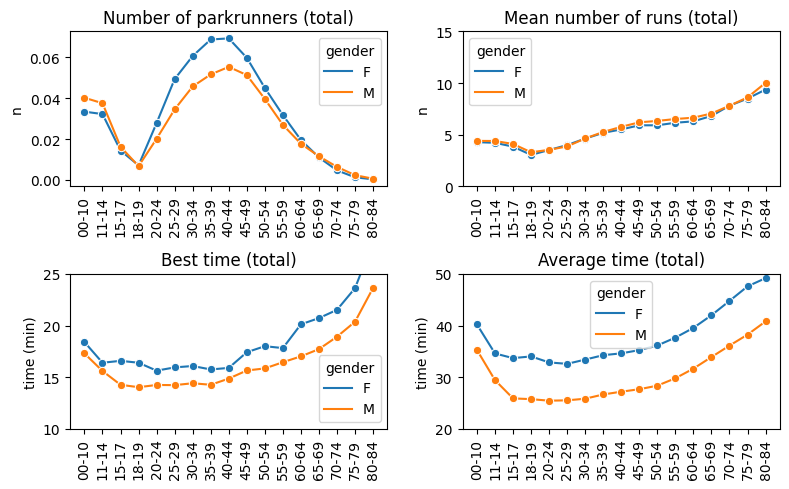

In [ ]:
standard_plots(df,'total')

SOUTHBANK


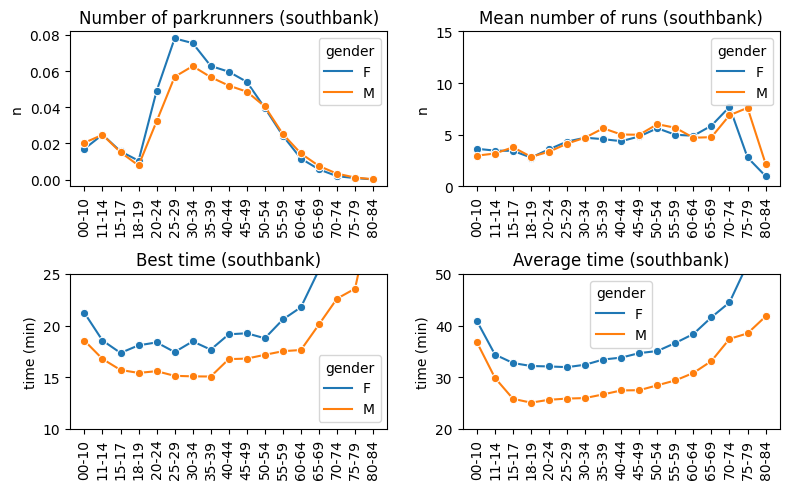

ALBERTMELBOURNE


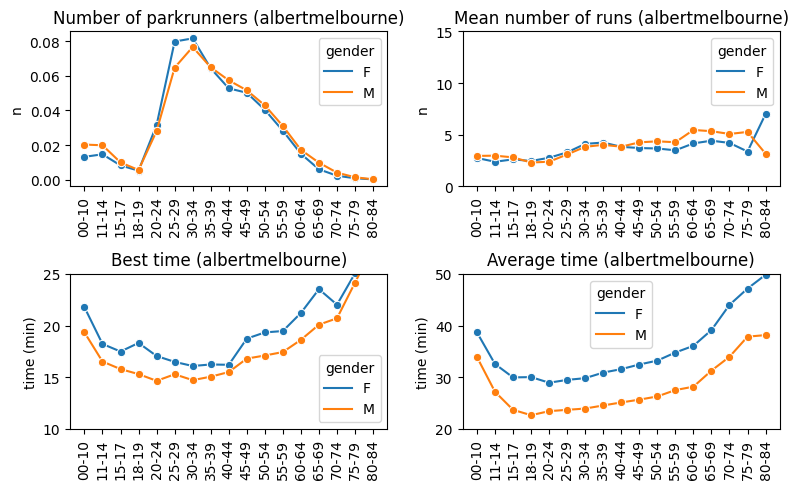

NEWFARM


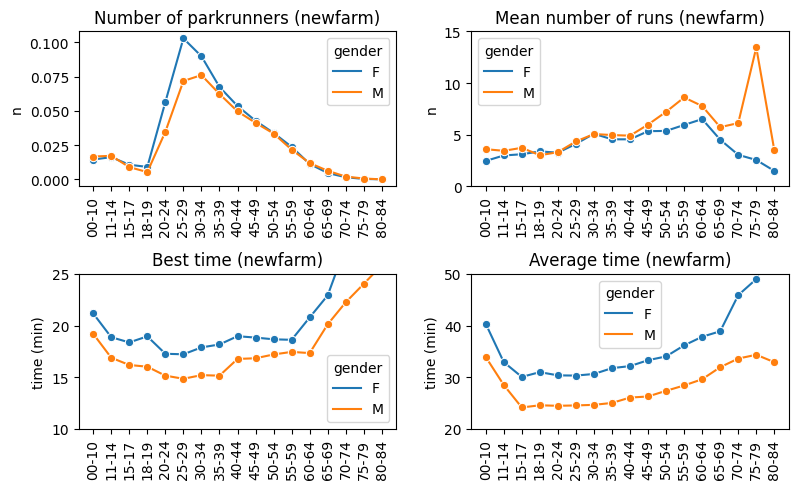

NEWY


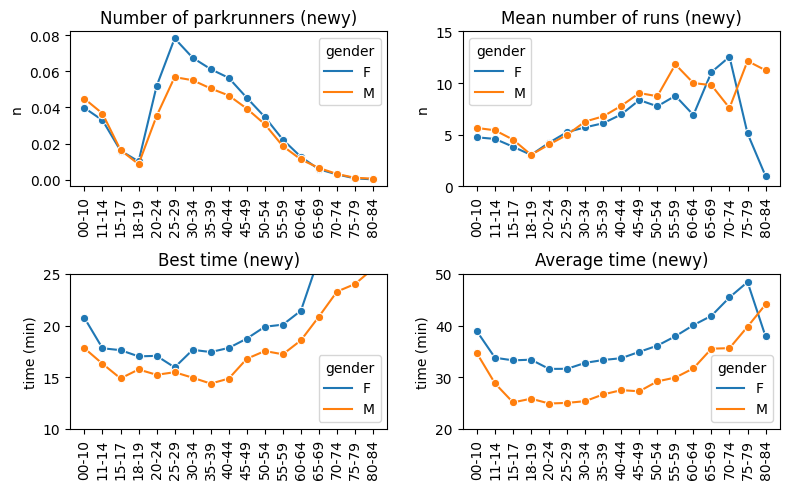

STPETERS


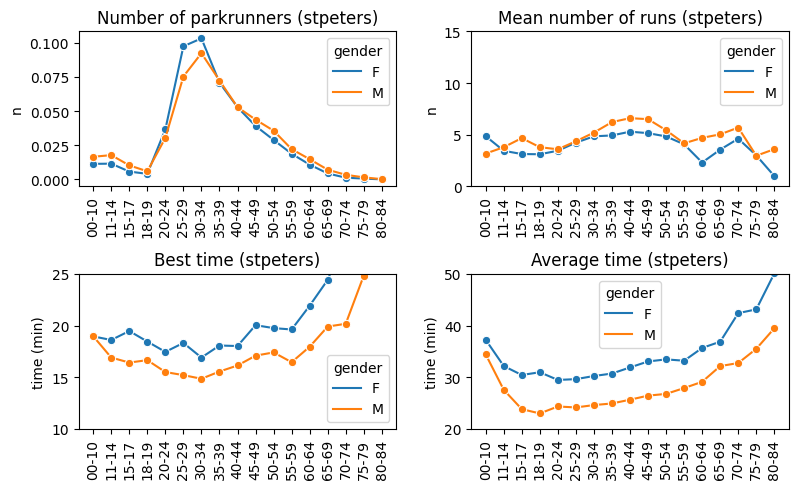

In [ ]:
for run in df.value_counts('parkrun').index[:5]:
    print(run.upper())
    standard_plots(df.query('parkrun == @run'), run)
    plt.show()

In [ ]:
df.groupby('parkrun')['n'].sum().sort_values().head(10)

parkrun
wandoo                  37
dobbynpark             151
cooberpedyoval         199
nolenspark             280
beaufortlake           290
princeofwales          298
chaffeypark            359
memorialpark           462
puckapunyal            479
nathaliashowgrounds    524
Name: n, dtype: int64